In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
n_sensors = 3
#n_sensors = 5
#n_sensors = 10
#n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
os.getcwd()

'C:\\Users\\User'

In [5]:
os.chdir('E:\\ANN_tsr')

In [6]:
os.getcwd()

'E:\\ANN_tsr'

In [7]:
TSR15_probe1 = pd.read_csv('TSR1.5_probe1.csv')
TSR15_probe3 = pd.read_csv('TSR1.5_probe3.csv')
TSR15_probe5 = pd.read_csv('TSR1.5_probe5.csv')
TSR16_probe1 = pd.read_csv('TSR1.6_probe1.csv')
TSR16_probe3 = pd.read_csv('TSR1.6_probe3.csv')
TSR16_probe5 = pd.read_csv('TSR1.6_probe5.csv')
TSR17_probe1 = pd.read_csv('TSR1.7_probe1.csv')
TSR17_probe3 = pd.read_csv('TSR1.7_probe3.csv')
TSR17_probe5 = pd.read_csv('TSR1.7_probe5.csv')
TSR18_probe1 = pd.read_csv('TSR1.8_probe1.csv')
TSR18_probe3 = pd.read_csv('TSR1.8_probe3.csv')
TSR18_probe5 = pd.read_csv('TSR1.8_probe5.csv')
TSR19_probe1 = pd.read_csv('TSR1.9_probe1.csv')
TSR19_probe3 = pd.read_csv('TSR1.9_probe3.csv')
TSR19_probe5 = pd.read_csv('TSR1.9_probe5.csv')
TSR20_probe1 = pd.read_csv('TSR2.0_probe1.csv')
TSR20_probe3 = pd.read_csv('TSR2.0_probe3.csv')
TSR20_probe5 = pd.read_csv('TSR2.0_probe5.csv')

In [8]:
TSR15_probe1 = TSR15_probe1.to_numpy(dtype='float32')
TSR15_probe3 = TSR15_probe3.to_numpy(dtype='float32')
TSR15_probe5 = TSR15_probe5.to_numpy(dtype='float32')
TSR16_probe1 = TSR16_probe1.to_numpy(dtype='float32')
TSR16_probe3 = TSR16_probe3.to_numpy(dtype='float32')
TSR16_probe5 = TSR16_probe5.to_numpy(dtype='float32')
TSR17_probe1 = TSR17_probe1.to_numpy(dtype='float32')
TSR17_probe3 = TSR17_probe3.to_numpy(dtype='float32')
TSR17_probe5 = TSR17_probe5.to_numpy(dtype='float32')
TSR18_probe1 = TSR18_probe1.to_numpy(dtype='float32')
TSR18_probe3 = TSR18_probe3.to_numpy(dtype='float32')
TSR18_probe5 = TSR18_probe5.to_numpy(dtype='float32')
TSR19_probe1 = TSR19_probe1.to_numpy(dtype='float32')
TSR19_probe3 = TSR19_probe3.to_numpy(dtype='float32')
TSR19_probe5 = TSR19_probe5.to_numpy(dtype='float32')
TSR20_probe1 = TSR20_probe1.to_numpy(dtype='float32')
TSR20_probe3 = TSR20_probe3.to_numpy(dtype='float32')
TSR20_probe5 = TSR20_probe5.to_numpy(dtype='float32')

In [9]:
x15_probe1 = TSR15_probe1[:, 5]
x15_probe3 = TSR15_probe3[:, 5]
x15_probe5 = TSR15_probe5[:, 5]
x16_probe1 = TSR16_probe1[:, 5]
x16_probe3 = TSR16_probe3[:, 5]
x16_probe5 = TSR16_probe5[:, 5]
x17_probe1 = TSR17_probe1[:, 5]
x17_probe3 = TSR17_probe3[:, 5]
x17_probe5 = TSR17_probe5[:, 5]
x18_probe1 = TSR18_probe1[:, 5]
x18_probe3 = TSR18_probe3[:, 5]
x18_probe5 = TSR18_probe5[:, 5]
x19_probe1 = TSR19_probe1[:, 5]
x19_probe3 = TSR19_probe3[:, 5]
x19_probe5 = TSR19_probe5[:, 5]
x20_probe1 = TSR20_probe1[:, 5]
x20_probe3 = TSR20_probe3[:, 5]
x20_probe5 = TSR20_probe5[:, 5]

In [10]:
x15_probe1 = x15_probe1.reshape((37, 1))
x15_probe3 = x15_probe3.reshape((37, 1))
x15_probe5 = x15_probe5.reshape((37, 1))
x16_probe1 = x16_probe1.reshape((37, 1))
x16_probe3 = x16_probe3.reshape((37, 1))
x16_probe5 = x16_probe5.reshape((37, 1))
x17_probe1 = x17_probe1.reshape((37, 1))
x17_probe3 = x17_probe3.reshape((37, 1))
x17_probe5 = x17_probe5.reshape((37, 1))
x18_probe1 = x18_probe1.reshape((37, 1))
x18_probe3 = x18_probe3.reshape((37, 1))
x18_probe5 = x18_probe5.reshape((37, 1))
x19_probe1 = x19_probe1.reshape((37, 1))
x19_probe3 = x19_probe3.reshape((37, 1))
x19_probe5 = x19_probe5.reshape((37, 1))
x20_probe1 = x20_probe1.reshape((37, 1))
x20_probe3 = x20_probe3.reshape((37, 1))
x20_probe5 = x20_probe5.reshape((37, 1))

In [11]:
print(x20_probe3.shape)

(37, 1)


In [12]:
x_train15 = np.hstack((x15_probe1, x15_probe3, x15_probe5))
x_train16 = np.hstack((x16_probe1, x16_probe3, x16_probe5))
x_train17 = np.hstack((x17_probe1, x17_probe3, x17_probe5))
x_train18 = np.hstack((x18_probe1, x18_probe3, x18_probe5))
x_train19 = np.hstack((x19_probe1, x19_probe3, x19_probe5))
x_train20 = np.hstack((x20_probe1, x20_probe3, x20_probe5))

In [13]:
x = np.vstack((x_train15, x_train16, x_train17, x_train18, x_train19, x_train20))

In [14]:
x = x.reshape(37*6, 3, 1)

In [15]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.5')

In [16]:
vor15_000 = pd.read_csv('1.5_4.9513_dimlessVor.csv', header=None)
vor15_010 = pd.read_csv('1.5_4.9580_dimlessVor.csv', header=None)
vor15_020 = pd.read_csv('1.5_4.9647_dimlessVor.csv', header=None)
vor15_030 = pd.read_csv('1.5_4.9714_dimlessVor.csv', header=None)
vor15_040 = pd.read_csv('1.5_4.9781_dimlessVor.csv', header=None)
vor15_050 = pd.read_csv('1.5_4.9848_dimlessVor.csv', header=None)
vor15_060 = pd.read_csv('1.5_4.9915_dimlessVor.csv', header=None)
vor15_070 = pd.read_csv('1.5_4.9982_dimlessVor.csv', header=None)
vor15_080 = pd.read_csv('1.5_5.0049_dimlessVor.csv', header=None)
vor15_090 = pd.read_csv('1.5_5.0116_dimlessVor.csv', header=None)
vor15_100 = pd.read_csv('1.5_5.0183_dimlessVor.csv', header=None)
vor15_110 = pd.read_csv('1.5_5.0250_dimlessVor.csv', header=None)
vor15_120 = pd.read_csv('1.5_5.0317_dimlessVor.csv', header=None)
vor15_130 = pd.read_csv('1.5_5.0384_dimlessVor.csv', header=None)
vor15_140 = pd.read_csv('1.5_5.0451_dimlessVor.csv', header=None)
vor15_150 = pd.read_csv('1.5_5.0518_dimlessVor.csv', header=None)
vor15_160 = pd.read_csv('1.5_5.0585_dimlessVor.csv', header=None)
vor15_170 = pd.read_csv('1.5_5.0652_dimlessVor.csv', header=None)
vor15_180 = pd.read_csv('1.5_5.0719_dimlessVor.csv', header=None)
vor15_190 = pd.read_csv('1.5_5.0786_dimlessVor.csv', header=None)
vor15_200 = pd.read_csv('1.5_5.0853_dimlessVor.csv', header=None)
vor15_210 = pd.read_csv('1.5_5.0920_dimlessVor.csv', header=None)
vor15_220 = pd.read_csv('1.5_5.0987_dimlessVor.csv', header=None)
vor15_230 = pd.read_csv('1.5_5.1054_dimlessVor.csv', header=None)
vor15_240 = pd.read_csv('1.5_5.1121_dimlessVor.csv', header=None)
vor15_250 = pd.read_csv('1.5_5.1188_dimlessVor.csv', header=None)
vor15_260 = pd.read_csv('1.5_5.1255_dimlessVor.csv', header=None)
vor15_270 = pd.read_csv('1.5_5.1322_dimlessVor.csv', header=None)
vor15_280 = pd.read_csv('1.5_5.1389_dimlessVor.csv', header=None)
vor15_290 = pd.read_csv('1.5_5.1456_dimlessVor.csv', header=None)
vor15_300 = pd.read_csv('1.5_5.1523_dimlessVor.csv', header=None)
vor15_310 = pd.read_csv('1.5_5.1590_dimlessVor.csv', header=None)
vor15_320 = pd.read_csv('1.5_5.1657_dimlessVor.csv', header=None)
vor15_330 = pd.read_csv('1.5_5.1724_dimlessVor.csv', header=None)
vor15_340 = pd.read_csv('1.5_5.1791_dimlessVor.csv', header=None)
vor15_350 = pd.read_csv('1.5_5.1858_dimlessVor.csv', header=None)
vor15_360 = pd.read_csv('1.5_5.1925_dimlessVor.csv', header=None)

In [17]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.6')

In [18]:
vor16_000 = pd.read_csv('1.6_4.943642_dimlessVor.csv', header=None)
vor16_010 = pd.read_csv('1.6_4.949884_dimlessVor.csv', header=None)
vor16_020 = pd.read_csv('1.6_4.956126_dimlessVor.csv', header=None)
vor16_030 = pd.read_csv('1.6_4.962368_dimlessVor.csv', header=None)
vor16_040 = pd.read_csv('1.6_4.968610_dimlessVor.csv', header=None)
vor16_050 = pd.read_csv('1.6_4.971731_dimlessVor.csv', header=None)
vor16_060 = pd.read_csv('1.6_4.977973_dimlessVor.csv', header=None)
vor16_070 = pd.read_csv('1.6_4.984215_dimlessVor.csv', header=None)
vor16_080 = pd.read_csv('1.6_4.990457_dimlessVor.csv', header=None)
vor16_090 = pd.read_csv('1.6_4.999820_dimlessVor.csv', header=None)
vor16_100 = pd.read_csv('1.6_5.006062_dimlessVor.csv', header=None)
vor16_110 = pd.read_csv('1.6_5.012304_dimlessVor.csv', header=None)
vor16_120 = pd.read_csv('1.6_5.018546_dimlessVor.csv', header=None)
vor16_130 = pd.read_csv('1.6_5.021667_dimlessVor.csv', header=None)
vor16_140 = pd.read_csv('1.6_5.027909_dimlessVor.csv', header=None)
vor16_150 = pd.read_csv('1.6_5.034151_dimlessVor.csv', header=None)
vor16_160 = pd.read_csv('1.6_5.040393_dimlessVor.csv', header=None)
vor16_170 = pd.read_csv('1.6_5.049756_dimlessVor.csv', header=None)
vor16_180 = pd.read_csv('1.6_5.055998_dimlessVor.csv', header=None)
vor16_190 = pd.read_csv('1.6_5.062240_dimlessVor.csv', header=None)
vor16_200 = pd.read_csv('1.6_5.068482_dimlessVor.csv', header=None)
vor16_210 = pd.read_csv('1.6_5.071603_dimlessVor.csv', header=None)
vor16_220 = pd.read_csv('1.6_5.077845_dimlessVor.csv', header=None)
vor16_230 = pd.read_csv('1.6_5.084087_dimlessVor.csv', header=None)
vor16_240 = pd.read_csv('1.6_5.090329_dimlessVor.csv', header=None)
vor16_250 = pd.read_csv('1.6_5.099692_dimlessVor.csv', header=None)
vor16_260 = pd.read_csv('1.6_5.105934_dimlessVor.csv', header=None)
vor16_270 = pd.read_csv('1.6_5.112176_dimlessVor.csv', header=None)
vor16_280 = pd.read_csv('1.6_5.118418_dimlessVor.csv', header=None)
vor16_290 = pd.read_csv('1.6_5.121539_dimlessVor.csv', header=None)
vor16_300 = pd.read_csv('1.6_5.127781_dimlessVor.csv', header=None)
vor16_310 = pd.read_csv('1.6_5.134023_dimlessVor.csv', header=None)
vor16_320 = pd.read_csv('1.6_5.140265_dimlessVor.csv', header=None)
vor16_330 = pd.read_csv('1.6_5.149628_dimlessVor.csv', header=None)
vor16_340 = pd.read_csv('1.6_5.155870_dimlessVor.csv', header=None)
vor16_350 = pd.read_csv('1.6_5.162112_dimlessVor.csv', header=None)
vor16_360 = pd.read_csv('1.6_5.168354_dimlessVor.csv', header=None)

In [19]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.7')

In [20]:
vor17_000 = pd.read_csv('1.7_4.4415_dimlessVor.csv', header=None)
vor17_010 = pd.read_csv('1.7_4.4474_dimlessVor.csv', header=None)
vor17_020 = pd.read_csv('1.7_4.4533_dimlessVor.csv', header=None)
vor17_030 = pd.read_csv('1.7_4.4592_dimlessVor.csv', header=None)
vor17_040 = pd.read_csv('1.7_4.4651_dimlessVor.csv', header=None)
vor17_050 = pd.read_csv('1.7_4.4710_dimlessVor.csv', header=None)
vor17_060 = pd.read_csv('1.7_4.4769_dimlessVor.csv', header=None)
vor17_070 = pd.read_csv('1.7_4.4828_dimlessVor.csv', header=None)
vor17_080 = pd.read_csv('1.7_4.4887_dimlessVor.csv', header=None)
vor17_090 = pd.read_csv('1.7_4.4946_dimlessVor.csv', header=None)
vor17_100 = pd.read_csv('1.7_4.5005_dimlessVor.csv', header=None)
vor17_110 = pd.read_csv('1.7_4.5064_dimlessVor.csv', header=None)
vor17_120 = pd.read_csv('1.7_4.5123_dimlessVor.csv', header=None)
vor17_130 = pd.read_csv('1.7_4.5182_dimlessVor.csv', header=None)
vor17_140 = pd.read_csv('1.7_4.5241_dimlessVor.csv', header=None)
vor17_150 = pd.read_csv('1.7_4.5300_dimlessVor.csv', header=None)
vor17_160 = pd.read_csv('1.7_4.5359_dimlessVor.csv', header=None)
vor17_170 = pd.read_csv('1.7_4.5418_dimlessVor.csv', header=None)
vor17_180 = pd.read_csv('1.7_4.5477_dimlessVor.csv', header=None)
vor17_190 = pd.read_csv('1.7_4.5536_dimlessVor.csv', header=None)
vor17_200 = pd.read_csv('1.7_4.5595_dimlessVor.csv', header=None)
vor17_210 = pd.read_csv('1.7_4.5654_dimlessVor.csv', header=None)
vor17_220 = pd.read_csv('1.7_4.5713_dimlessVor.csv', header=None)
vor17_230 = pd.read_csv('1.7_4.5772_dimlessVor.csv', header=None)
vor17_240 = pd.read_csv('1.7_4.5831_dimlessVor.csv', header=None)
vor17_250 = pd.read_csv('1.7_4.5890_dimlessVor.csv', header=None)
vor17_260 = pd.read_csv('1.7_4.5949_dimlessVor.csv', header=None)
vor17_270 = pd.read_csv('1.7_4.6008_dimlessVor.csv', header=None)
vor17_280 = pd.read_csv('1.7_4.6067_dimlessVor.csv', header=None)
vor17_290 = pd.read_csv('1.7_4.6126_dimlessVor.csv', header=None)
vor17_300 = pd.read_csv('1.7_4.6185_dimlessVor.csv', header=None)
vor17_310 = pd.read_csv('1.7_4.6244_dimlessVor.csv', header=None)
vor17_320 = pd.read_csv('1.7_4.6303_dimlessVor.csv', header=None)
vor17_330 = pd.read_csv('1.7_4.6362_dimlessVor.csv', header=None)
vor17_340 = pd.read_csv('1.7_4.6421_dimlessVor.csv', header=None)
vor17_350 = pd.read_csv('1.7_4.6480_dimlessVor.csv', header=None)
vor17_360 = pd.read_csv('1.7_4.652846_dimlessVor.csv', header=None)

In [21]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.8')

In [22]:
vor18_000 = pd.read_csv('1.8_4.394346_dimlessVor.csv', header=None)
vor18_010 = pd.read_csv('1.8_4.399894_dimlessVor.csv', header=None)
vor18_020 = pd.read_csv('1.8_4.405442_dimlessVor.csv', header=None)
vor18_030 = pd.read_csv('1.8_4.410990_dimlessVor.csv', header=None)
vor18_040 = pd.read_csv('1.8_4.416538_dimlessVor.csv', header=None)
vor18_050 = pd.read_csv('1.8_4.422086_dimlessVor.csv', header=None)
vor18_060 = pd.read_csv('1.8_4.427634_dimlessVor.csv', header=None)
vor18_070 = pd.read_csv('1.8_4.433182_dimlessVor.csv', header=None)
vor18_080 = pd.read_csv('1.8_4.438730_dimlessVor.csv', header=None)
vor18_090 = pd.read_csv('1.8_4.444278_dimlessVor.csv', header=None)
vor18_100 = pd.read_csv('1.8_4.449826_dimlessVor.csv', header=None)
vor18_110 = pd.read_csv('1.8_4.455374_dimlessVor.csv', header=None)
vor18_120 = pd.read_csv('1.8_4.460922_dimlessVor.csv', header=None)
vor18_130 = pd.read_csv('1.8_4.466470_dimlessVor.csv', header=None)
vor18_140 = pd.read_csv('1.8_4.472018_dimlessVor.csv', header=None)
vor18_150 = pd.read_csv('1.8_4.477566_dimlessVor.csv', header=None)
vor18_160 = pd.read_csv('1.8_4.483114_dimlessVor.csv', header=None)
vor18_170 = pd.read_csv('1.8_4.488662_dimlessVor.csv', header=None)
vor18_180 = pd.read_csv('1.8_4.494210_dimlessVor.csv', header=None)
vor18_190 = pd.read_csv('1.8_4.499758_dimlessVor.csv', header=None)
vor18_200 = pd.read_csv('1.8_4.505306_dimlessVor.csv', header=None)
vor18_210 = pd.read_csv('1.8_4.510854_dimlessVor.csv', header=None)
vor18_220 = pd.read_csv('1.8_4.516402_dimlessVor.csv', header=None)
vor18_230 = pd.read_csv('1.8_4.521950_dimlessVor.csv', header=None)
vor18_240 = pd.read_csv('1.8_4.527498_dimlessVor.csv', header=None)
vor18_250 = pd.read_csv('1.8_4.533046_dimlessVor.csv', header=None)
vor18_260 = pd.read_csv('1.8_4.538594_dimlessVor.csv', header=None)
vor18_270 = pd.read_csv('1.8_4.544142_dimlessVor.csv', header=None)
vor18_280 = pd.read_csv('1.8_4.549690_dimlessVor.csv', header=None)
vor18_290 = pd.read_csv('1.8_4.555238_dimlessVor.csv', header=None)
vor18_300 = pd.read_csv('1.8_4.560786_dimlessVor.csv', header=None)
vor18_310 = pd.read_csv('1.8_4.566334_dimlessVor.csv', header=None)
vor18_320 = pd.read_csv('1.8_4.571882_dimlessVor.csv', header=None)
vor18_330 = pd.read_csv('1.8_4.577430_dimlessVor.csv', header=None)
vor18_340 = pd.read_csv('1.8_4.582978_dimlessVor.csv', header=None)
vor18_350 = pd.read_csv('1.8_4.588526_dimlessVor.csv', header=None)
vor18_360 = pd.read_csv('1.8_4.594074_dimlessVor.csv', header=None)

In [23]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR1.9')

In [24]:
vor19_000 = pd.read_csv('1.9_3.973816_dimlessVor.csv', header=None)
vor19_010 = pd.read_csv('1.9_3.979072_dimlessVor.csv', header=None)
vor19_020 = pd.read_csv('1.9_3.984328_dimlessVor.csv', header=None)
vor19_030 = pd.read_csv('1.9_3.989584_dimlessVor.csv', header=None)
vor19_040 = pd.read_csv('1.9_3.994840_dimlessVor.csv', header=None)
vor19_050 = pd.read_csv('1.9_4.000096_dimlessVor.csv', header=None)
vor19_060 = pd.read_csv('1.9_4.005352_dimlessVor.csv', header=None)
vor19_070 = pd.read_csv('1.9_4.010608_dimlessVor.csv', header=None)
vor19_080 = pd.read_csv('1.9_4.015864_dimlessVor.csv', header=None)
vor19_090 = pd.read_csv('1.9_4.021120_dimlessVor.csv', header=None)
vor19_100 = pd.read_csv('1.9_4.026376_dimlessVor.csv', header=None)
vor19_110 = pd.read_csv('1.9_4.031632_dimlessVor.csv', header=None)
vor19_120 = pd.read_csv('1.9_4.036888_dimlessVor.csv', header=None)
vor19_130 = pd.read_csv('1.9_4.042144_dimlessVor.csv', header=None)
vor19_140 = pd.read_csv('1.9_4.047400_dimlessVor.csv', header=None)
vor19_150 = pd.read_csv('1.9_4.052656_dimlessVor.csv', header=None)
vor19_160 = pd.read_csv('1.9_4.057912_dimlessVor.csv', header=None)
vor19_170 = pd.read_csv('1.9_4.063168_dimlessVor.csv', header=None)
vor19_180 = pd.read_csv('1.9_4.068424_dimlessVor.csv', header=None)
vor19_190 = pd.read_csv('1.9_4.073680_dimlessVor.csv', header=None)
vor19_200 = pd.read_csv('1.9_4.078936_dimlessVor.csv', header=None)
vor19_210 = pd.read_csv('1.9_4.084192_dimlessVor.csv', header=None)
vor19_220 = pd.read_csv('1.9_4.089448_dimlessVor.csv', header=None)
vor19_230 = pd.read_csv('1.9_4.094704_dimlessVor.csv', header=None)
vor19_240 = pd.read_csv('1.9_4.099960_dimlessVor.csv', header=None)
vor19_250 = pd.read_csv('1.9_4.105216_dimlessVor.csv', header=None)
vor19_260 = pd.read_csv('1.9_4.110472_dimlessVor.csv', header=None)
vor19_270 = pd.read_csv('1.9_4.115728_dimlessVor.csv', header=None)
vor19_280 = pd.read_csv('1.9_4.120984_dimlessVor.csv', header=None)
vor19_290 = pd.read_csv('1.9_4.126240_dimlessVor.csv', header=None)
vor19_300 = pd.read_csv('1.9_4.131496_dimlessVor.csv', header=None)
vor19_310 = pd.read_csv('1.9_4.136752_dimlessVor.csv', header=None)
vor19_320 = pd.read_csv('1.9_4.142008_dimlessVor.csv', header=None)
vor19_330 = pd.read_csv('1.9_4.147264_dimlessVor.csv', header=None)
vor19_340 = pd.read_csv('1.9_4.152520_dimlessVor.csv', header=None)
vor19_350 = pd.read_csv('1.9_4.157776_dimlessVor.csv', header=None)
vor19_360 = pd.read_csv('1.9_4.163032_dimlessVor.csv', header=None)

In [25]:
os.chdir('E:\\MLdataset\\vorticity_interpolation\\TSR2.0')

In [26]:
vor20_000 = pd.read_csv('_3.7751910000000000_dimlessVor.csv', header=None)
vor20_010 = pd.read_csv('_3.7801849999999999_dimlessVor.csv', header=None)
vor20_020 = pd.read_csv('_3.7851789999999998_dimlessVor.csv', header=None)
vor20_030 = pd.read_csv('_3.7901729999999998_dimlessVor.csv', header=None)
vor20_040 = pd.read_csv('_3.7951670000000002_dimlessVor.csv', header=None)
vor20_050 = pd.read_csv('_3.8001610000000001_dimlessVor.csv', header=None)
vor20_060 = pd.read_csv('_3.8051550000000001_dimlessVor.csv', header=None)
vor20_070 = pd.read_csv('_3.8101490000000000_dimlessVor.csv', header=None)
vor20_080 = pd.read_csv('_3.8151430000000000_dimlessVor.csv', header=None)
vor20_090 = pd.read_csv('_3.8201369999999999_dimlessVor.csv', header=None)
vor20_100 = pd.read_csv('_3.8251309999999998_dimlessVor.csv', header=None)
vor20_110 = pd.read_csv('_3.8301249999999998_dimlessVor.csv', header=None)
vor20_120 = pd.read_csv('_3.8351190000000002_dimlessVor.csv', header=None)
vor20_130 = pd.read_csv('_3.8401130000000001_dimlessVor.csv', header=None)
vor20_140 = pd.read_csv('_3.8451070000000001_dimlessVor.csv', header=None)
vor20_150 = pd.read_csv('_3.8501010000000000_dimlessVor.csv', header=None)
vor20_160 = pd.read_csv('_3.8550949999999999_dimlessVor.csv', header=None)
vor20_170 = pd.read_csv('_3.8600889999999999_dimlessVor.csv', header=None)
vor20_180 = pd.read_csv('_3.8650829999999998_dimlessVor.csv', header=None)
vor20_190 = pd.read_csv('_3.8700769999999998_dimlessVor.csv', header=None)
vor20_200 = pd.read_csv('_3.8750710000000002_dimlessVor.csv', header=None)
vor20_210 = pd.read_csv('_3.8800650000000001_dimlessVor.csv', header=None)
vor20_220 = pd.read_csv('_3.8850590000000000_dimlessVor.csv', header=None)
vor20_230 = pd.read_csv('_3.8900530000000000_dimlessVor.csv', header=None)
vor20_240 = pd.read_csv('_3.8950469999999999_dimlessVor.csv', header=None)
vor20_250 = pd.read_csv('_3.9000409999999999_dimlessVor.csv', header=None)
vor20_260 = pd.read_csv('_3.9050349999999998_dimlessVor.csv', header=None)
vor20_270 = pd.read_csv('_3.9100289999999998_dimlessVor.csv', header=None)
vor20_280 = pd.read_csv('_3.9150230000000001_dimlessVor.csv', header=None)
vor20_290 = pd.read_csv('_3.9200170000000001_dimlessVor.csv', header=None)
vor20_300 = pd.read_csv('_3.9250110000000000_dimlessVor.csv', header=None)
vor20_310 = pd.read_csv('_3.9300050000000000_dimlessVor.csv', header=None)
vor20_320 = pd.read_csv('_3.9349989999999999_dimlessVor.csv', header=None)
vor20_330 = pd.read_csv('_3.9399929999999999_dimlessVor.csv', header=None)
vor20_340 = pd.read_csv('_3.9449869999999998_dimlessVor.csv', header=None)
vor20_350 = pd.read_csv('_3.9499810000000002_dimlessVor.csv', header=None)
vor20_360 = pd.read_csv('_3.9549750000000001_dimlessVor.csv', header=None)

In [27]:
os.chdir('C:\\Users\\User')

In [28]:
vor15_000 = vor15_000.to_numpy(dtype='float32')
vor15_010 = vor15_010.to_numpy(dtype='float32')
vor15_020 = vor15_020.to_numpy(dtype='float32')
vor15_030 = vor15_030.to_numpy(dtype='float32')
vor15_040 = vor15_040.to_numpy(dtype='float32')
vor15_050 = vor15_050.to_numpy(dtype='float32')
vor15_060 = vor15_060.to_numpy(dtype='float32')
vor15_070 = vor15_070.to_numpy(dtype='float32')
vor15_080 = vor15_080.to_numpy(dtype='float32')
vor15_090 = vor15_090.to_numpy(dtype='float32')
vor15_100 = vor15_100.to_numpy(dtype='float32')
vor15_110 = vor15_110.to_numpy(dtype='float32')
vor15_120 = vor15_120.to_numpy(dtype='float32')
vor15_130 = vor15_130.to_numpy(dtype='float32')
vor15_140 = vor15_140.to_numpy(dtype='float32')
vor15_150 = vor15_150.to_numpy(dtype='float32')
vor15_160 = vor15_160.to_numpy(dtype='float32')
vor15_170 = vor15_170.to_numpy(dtype='float32')
vor15_180 = vor15_180.to_numpy(dtype='float32')
vor15_190 = vor15_190.to_numpy(dtype='float32')
vor15_200 = vor15_200.to_numpy(dtype='float32')
vor15_210 = vor15_210.to_numpy(dtype='float32')
vor15_220 = vor15_220.to_numpy(dtype='float32')
vor15_230 = vor15_230.to_numpy(dtype='float32')
vor15_240 = vor15_240.to_numpy(dtype='float32')
vor15_250 = vor15_250.to_numpy(dtype='float32')
vor15_260 = vor15_260.to_numpy(dtype='float32')
vor15_270 = vor15_270.to_numpy(dtype='float32')
vor15_280 = vor15_280.to_numpy(dtype='float32')
vor15_290 = vor15_290.to_numpy(dtype='float32')
vor15_300 = vor15_300.to_numpy(dtype='float32')
vor15_310 = vor15_310.to_numpy(dtype='float32')
vor15_320 = vor15_320.to_numpy(dtype='float32')
vor15_330 = vor15_330.to_numpy(dtype='float32')
vor15_340 = vor15_340.to_numpy(dtype='float32')
vor15_350 = vor15_350.to_numpy(dtype='float32')
vor15_360 = vor15_360.to_numpy(dtype='float32')

In [29]:
vor16_000 = vor16_000.to_numpy(dtype='float32')
vor16_010 = vor16_010.to_numpy(dtype='float32')
vor16_020 = vor16_020.to_numpy(dtype='float32')
vor16_030 = vor16_030.to_numpy(dtype='float32')
vor16_040 = vor16_040.to_numpy(dtype='float32')
vor16_050 = vor16_050.to_numpy(dtype='float32')
vor16_060 = vor16_060.to_numpy(dtype='float32')
vor16_070 = vor16_070.to_numpy(dtype='float32')
vor16_080 = vor16_080.to_numpy(dtype='float32')
vor16_090 = vor16_090.to_numpy(dtype='float32')
vor16_100 = vor16_100.to_numpy(dtype='float32')
vor16_110 = vor16_110.to_numpy(dtype='float32')
vor16_120 = vor16_120.to_numpy(dtype='float32')
vor16_130 = vor16_130.to_numpy(dtype='float32')
vor16_140 = vor16_140.to_numpy(dtype='float32')
vor16_150 = vor16_150.to_numpy(dtype='float32')
vor16_160 = vor16_160.to_numpy(dtype='float32')
vor16_170 = vor16_170.to_numpy(dtype='float32')
vor16_180 = vor16_180.to_numpy(dtype='float32')
vor16_190 = vor16_190.to_numpy(dtype='float32')
vor16_200 = vor16_200.to_numpy(dtype='float32')
vor16_210 = vor16_210.to_numpy(dtype='float32')
vor16_220 = vor16_220.to_numpy(dtype='float32')
vor16_230 = vor16_230.to_numpy(dtype='float32')
vor16_240 = vor16_240.to_numpy(dtype='float32')
vor16_250 = vor16_250.to_numpy(dtype='float32')
vor16_260 = vor16_260.to_numpy(dtype='float32')
vor16_270 = vor16_270.to_numpy(dtype='float32')
vor16_280 = vor16_280.to_numpy(dtype='float32')
vor16_290 = vor16_290.to_numpy(dtype='float32')
vor16_300 = vor16_300.to_numpy(dtype='float32')
vor16_310 = vor16_310.to_numpy(dtype='float32')
vor16_320 = vor16_320.to_numpy(dtype='float32')
vor16_330 = vor16_330.to_numpy(dtype='float32')
vor16_340 = vor16_340.to_numpy(dtype='float32')
vor16_350 = vor16_350.to_numpy(dtype='float32')
vor16_360 = vor16_360.to_numpy(dtype='float32')

In [30]:
vor17_000 = vor17_000.to_numpy(dtype='float32')
vor17_010 = vor17_010.to_numpy(dtype='float32')
vor17_020 = vor17_020.to_numpy(dtype='float32')
vor17_030 = vor17_030.to_numpy(dtype='float32')
vor17_040 = vor17_040.to_numpy(dtype='float32')
vor17_050 = vor17_050.to_numpy(dtype='float32')
vor17_060 = vor17_060.to_numpy(dtype='float32')
vor17_070 = vor17_070.to_numpy(dtype='float32')
vor17_080 = vor17_080.to_numpy(dtype='float32')
vor17_090 = vor17_090.to_numpy(dtype='float32')
vor17_100 = vor17_100.to_numpy(dtype='float32')
vor17_110 = vor17_110.to_numpy(dtype='float32')
vor17_120 = vor17_120.to_numpy(dtype='float32')
vor17_130 = vor17_130.to_numpy(dtype='float32')
vor17_140 = vor17_140.to_numpy(dtype='float32')
vor17_150 = vor17_150.to_numpy(dtype='float32')
vor17_160 = vor17_160.to_numpy(dtype='float32')
vor17_170 = vor17_170.to_numpy(dtype='float32')
vor17_180 = vor17_180.to_numpy(dtype='float32')
vor17_190 = vor17_190.to_numpy(dtype='float32')
vor17_200 = vor17_200.to_numpy(dtype='float32')
vor17_210 = vor17_210.to_numpy(dtype='float32')
vor17_220 = vor17_220.to_numpy(dtype='float32')
vor17_230 = vor17_230.to_numpy(dtype='float32')
vor17_240 = vor17_240.to_numpy(dtype='float32')
vor17_250 = vor17_250.to_numpy(dtype='float32')
vor17_260 = vor17_260.to_numpy(dtype='float32')
vor17_270 = vor17_270.to_numpy(dtype='float32')
vor17_280 = vor17_280.to_numpy(dtype='float32')
vor17_290 = vor17_290.to_numpy(dtype='float32')
vor17_300 = vor17_300.to_numpy(dtype='float32')
vor17_310 = vor17_310.to_numpy(dtype='float32')
vor17_320 = vor17_320.to_numpy(dtype='float32')
vor17_330 = vor17_330.to_numpy(dtype='float32')
vor17_340 = vor17_340.to_numpy(dtype='float32')
vor17_350 = vor17_350.to_numpy(dtype='float32')
vor17_360 = vor17_360.to_numpy(dtype='float32')

In [31]:
vor18_000 = vor18_000.to_numpy(dtype='float32')
vor18_010 = vor18_010.to_numpy(dtype='float32')
vor18_020 = vor18_020.to_numpy(dtype='float32')
vor18_030 = vor18_030.to_numpy(dtype='float32')
vor18_040 = vor18_040.to_numpy(dtype='float32')
vor18_050 = vor18_050.to_numpy(dtype='float32')
vor18_060 = vor18_060.to_numpy(dtype='float32')
vor18_070 = vor18_070.to_numpy(dtype='float32')
vor18_080 = vor18_080.to_numpy(dtype='float32')
vor18_090 = vor18_090.to_numpy(dtype='float32')
vor18_100 = vor18_100.to_numpy(dtype='float32')
vor18_110 = vor18_110.to_numpy(dtype='float32')
vor18_120 = vor18_120.to_numpy(dtype='float32')
vor18_130 = vor18_130.to_numpy(dtype='float32')
vor18_140 = vor18_140.to_numpy(dtype='float32')
vor18_150 = vor18_150.to_numpy(dtype='float32')
vor18_160 = vor18_160.to_numpy(dtype='float32')
vor18_170 = vor18_170.to_numpy(dtype='float32')
vor18_180 = vor18_180.to_numpy(dtype='float32')
vor18_190 = vor18_190.to_numpy(dtype='float32')
vor18_200 = vor18_200.to_numpy(dtype='float32')
vor18_210 = vor18_210.to_numpy(dtype='float32')
vor18_220 = vor18_220.to_numpy(dtype='float32')
vor18_230 = vor18_230.to_numpy(dtype='float32')
vor18_240 = vor18_240.to_numpy(dtype='float32')
vor18_250 = vor18_250.to_numpy(dtype='float32')
vor18_260 = vor18_260.to_numpy(dtype='float32')
vor18_270 = vor18_270.to_numpy(dtype='float32')
vor18_280 = vor18_280.to_numpy(dtype='float32')
vor18_290 = vor18_290.to_numpy(dtype='float32')
vor18_300 = vor18_300.to_numpy(dtype='float32')
vor18_310 = vor18_310.to_numpy(dtype='float32')
vor18_320 = vor18_320.to_numpy(dtype='float32')
vor18_330 = vor18_330.to_numpy(dtype='float32')
vor18_340 = vor18_340.to_numpy(dtype='float32')
vor18_350 = vor18_350.to_numpy(dtype='float32')
vor18_360 = vor18_360.to_numpy(dtype='float32')

In [32]:
vor19_000 = vor19_000.to_numpy(dtype='float32')
vor19_010 = vor19_010.to_numpy(dtype='float32')
vor19_020 = vor19_020.to_numpy(dtype='float32')
vor19_030 = vor19_030.to_numpy(dtype='float32')
vor19_040 = vor19_040.to_numpy(dtype='float32')
vor19_050 = vor19_050.to_numpy(dtype='float32')
vor19_060 = vor19_060.to_numpy(dtype='float32')
vor19_070 = vor19_070.to_numpy(dtype='float32')
vor19_080 = vor19_080.to_numpy(dtype='float32')
vor19_090 = vor19_090.to_numpy(dtype='float32')
vor19_100 = vor19_100.to_numpy(dtype='float32')
vor19_110 = vor19_110.to_numpy(dtype='float32')
vor19_120 = vor19_120.to_numpy(dtype='float32')
vor19_130 = vor19_130.to_numpy(dtype='float32')
vor19_140 = vor19_140.to_numpy(dtype='float32')
vor19_150 = vor19_150.to_numpy(dtype='float32')
vor19_160 = vor19_160.to_numpy(dtype='float32')
vor19_170 = vor19_170.to_numpy(dtype='float32')
vor19_180 = vor19_180.to_numpy(dtype='float32')
vor19_190 = vor19_190.to_numpy(dtype='float32')
vor19_200 = vor19_200.to_numpy(dtype='float32')
vor19_210 = vor19_210.to_numpy(dtype='float32')
vor19_220 = vor19_220.to_numpy(dtype='float32')
vor19_230 = vor19_230.to_numpy(dtype='float32')
vor19_240 = vor19_240.to_numpy(dtype='float32')
vor19_250 = vor19_250.to_numpy(dtype='float32')
vor19_260 = vor19_260.to_numpy(dtype='float32')
vor19_270 = vor19_270.to_numpy(dtype='float32')
vor19_280 = vor19_280.to_numpy(dtype='float32')
vor19_290 = vor19_290.to_numpy(dtype='float32')
vor19_300 = vor19_300.to_numpy(dtype='float32')
vor19_310 = vor19_310.to_numpy(dtype='float32')
vor19_320 = vor19_320.to_numpy(dtype='float32')
vor19_330 = vor19_330.to_numpy(dtype='float32')
vor19_340 = vor19_340.to_numpy(dtype='float32')
vor19_350 = vor19_350.to_numpy(dtype='float32')
vor19_360 = vor19_360.to_numpy(dtype='float32')

In [33]:
vor20_000 = vor20_000.to_numpy(dtype='float32')
vor20_010 = vor20_010.to_numpy(dtype='float32')
vor20_020 = vor20_020.to_numpy(dtype='float32')
vor20_030 = vor20_030.to_numpy(dtype='float32')
vor20_040 = vor20_040.to_numpy(dtype='float32')
vor20_050 = vor20_050.to_numpy(dtype='float32')
vor20_060 = vor20_060.to_numpy(dtype='float32')
vor20_070 = vor20_070.to_numpy(dtype='float32')
vor20_080 = vor20_080.to_numpy(dtype='float32')
vor20_090 = vor20_090.to_numpy(dtype='float32')
vor20_100 = vor20_100.to_numpy(dtype='float32')
vor20_110 = vor20_110.to_numpy(dtype='float32')
vor20_120 = vor20_120.to_numpy(dtype='float32')
vor20_130 = vor20_130.to_numpy(dtype='float32')
vor20_140 = vor20_140.to_numpy(dtype='float32')
vor20_150 = vor20_150.to_numpy(dtype='float32')
vor20_160 = vor20_160.to_numpy(dtype='float32')
vor20_170 = vor20_170.to_numpy(dtype='float32')
vor20_180 = vor20_180.to_numpy(dtype='float32')
vor20_190 = vor20_190.to_numpy(dtype='float32')
vor20_200 = vor20_200.to_numpy(dtype='float32')
vor20_210 = vor20_210.to_numpy(dtype='float32')
vor20_220 = vor20_220.to_numpy(dtype='float32')
vor20_230 = vor20_230.to_numpy(dtype='float32')
vor20_240 = vor20_240.to_numpy(dtype='float32')
vor20_250 = vor20_250.to_numpy(dtype='float32')
vor20_260 = vor20_260.to_numpy(dtype='float32')
vor20_270 = vor20_270.to_numpy(dtype='float32')
vor20_280 = vor20_280.to_numpy(dtype='float32')
vor20_290 = vor20_290.to_numpy(dtype='float32')
vor20_300 = vor20_300.to_numpy(dtype='float32')
vor20_310 = vor20_310.to_numpy(dtype='float32')
vor20_320 = vor20_320.to_numpy(dtype='float32')
vor20_330 = vor20_330.to_numpy(dtype='float32')
vor20_340 = vor20_340.to_numpy(dtype='float32')
vor20_350 = vor20_350.to_numpy(dtype='float32')
vor20_360 = vor20_360.to_numpy(dtype='float32')

In [34]:
TSR15_field = np.vstack((vor15_000, vor15_010, vor15_020, vor15_030, vor15_040, vor15_050, vor15_060, vor15_070,
                         vor15_080, vor15_090, vor15_100, vor15_110, vor15_120, vor15_130, vor15_140, vor15_150,
                         vor15_160, vor15_170, vor15_180, vor15_190, vor15_200, vor15_210, vor15_220, vor15_230,
                         vor15_240, vor15_250, vor15_260, vor15_270, vor15_280, vor15_290, vor15_300, vor15_310,
                         vor15_320, vor15_330, vor15_340, vor15_350, vor15_360))
TSR16_field = np.vstack((vor16_000, vor16_010, vor16_020, vor16_030, vor16_040, vor16_050, vor16_060, vor16_070,
                         vor16_080, vor16_090, vor16_100, vor16_110, vor16_120, vor16_130, vor16_140, vor16_150,
                         vor16_160, vor16_170, vor16_180, vor16_190, vor16_200, vor16_210, vor16_220, vor16_230,
                         vor16_240, vor16_250, vor16_260, vor16_270, vor16_280, vor16_290, vor16_300, vor16_310,
                         vor16_320, vor16_330, vor16_340, vor16_350, vor16_360))
TSR17_field = np.vstack((vor17_000, vor17_010, vor17_020, vor17_030, vor17_040, vor17_050, vor17_060, vor17_070,
                         vor17_080, vor17_090, vor17_100, vor17_110, vor17_120, vor17_130, vor17_140, vor17_150,
                         vor17_160, vor17_170, vor17_180, vor17_190, vor17_200, vor17_210, vor17_220, vor17_230,
                         vor17_240, vor17_250, vor17_260, vor17_270, vor17_280, vor17_290, vor17_300, vor17_310,
                         vor17_320, vor17_330, vor17_340, vor17_350, vor17_360))
TSR18_field = np.vstack((vor18_000, vor18_010, vor18_020, vor18_030, vor18_040, vor18_050, vor18_060, vor18_070,
                         vor18_080, vor18_090, vor18_100, vor18_110, vor18_120, vor18_130, vor18_140, vor18_150,
                         vor18_160, vor18_170, vor18_180, vor18_190, vor18_200, vor18_210, vor18_220, vor18_230,
                         vor18_240, vor18_250, vor18_260, vor18_270, vor18_280, vor18_290, vor18_300, vor18_310,
                         vor18_320, vor18_330, vor18_340, vor18_350, vor18_360))
TSR19_field = np.vstack((vor19_000, vor19_010, vor19_020, vor19_030, vor19_040, vor19_050, vor19_060, vor19_070,
                         vor19_080, vor19_090, vor19_100, vor19_110, vor19_120, vor19_130, vor19_140, vor19_150,
                         vor19_160, vor19_170, vor19_180, vor19_190, vor19_200, vor19_210, vor19_220, vor19_230,
                         vor19_240, vor19_250, vor19_260, vor19_270, vor19_280, vor19_290, vor19_300, vor19_310,
                         vor19_320, vor19_330, vor19_340, vor19_350, vor19_360))
TSR20_field = np.vstack((vor20_000, vor20_010, vor20_020, vor20_030, vor20_040, vor20_050, vor20_060, vor19_070,
                         vor20_080, vor20_090, vor20_100, vor20_110, vor20_120, vor20_130, vor20_140, vor19_150,
                         vor20_160, vor20_170, vor20_180, vor20_190, vor20_200, vor20_210, vor20_220, vor19_230,
                         vor20_240, vor20_250, vor20_260, vor20_270, vor20_280, vor20_290, vor20_300, vor19_310,
                         vor20_320, vor20_330, vor20_340, vor20_350, vor20_360))

In [35]:
TSR15_field.shape

(3700, 100)

In [36]:
y = np.vstack((TSR15_field, TSR16_field, TSR17_field, TSR18_field, TSR19_field, TSR20_field))

In [37]:
y = y.reshape(37*6, 100, 100)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
print(y_train.shape)

(155, 100, 100)


In [40]:
print(y_test.shape)

(67, 100, 100)


In [41]:
print(x_train.shape)

(155, 3, 1)


In [42]:
print(x_test.shape)

(67, 3, 1)


In [43]:
os.chdir('C:\\Users\\User')

In [44]:
'''model = tf.keras.models.Sequential([tf.keras.layers.Dense(input_shape=(n_sensors,), units=5, activation='relu', name='inputLayer'),
                                    tf.keras.layers.Dense(units=35, activation='relu', name='firstHiddenLayer'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(units=40, activation='relu', name='secondHiddenLayer'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')
])
'''
# Noise가 첨가되지 않은 데이터이므로 dropout 층은 생략
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=35, activation='relu', name='firstHiddenLayer')(reshape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=40, activation='relu', name='secondHiddenLayer')(x)
x = tf.keras.layers.BatchNormalization()(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [45]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 3)                 0         
                                                                 
 firstHiddenLayer (Dense)    (None, 35)                140       
                                                                 
 batch_normalization (BatchN  (None, 35)               140       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 40)                1440      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [46]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [47]:
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)

Epoch 1/10000
5/5 [==============================] - 1s 7ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0173 - rmse: 0.1317
Epoch 3/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 4/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 5/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0147 - rmse: 0.1213
Epoch 6/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 7/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 8/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 9/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 10/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 11/10000
5/5 [=============================

5/5 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 87/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 88/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 89/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 90/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 91/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 92/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 93/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0771
Epoch 94/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 95/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 171/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 172/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0675
Epoch 175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 176/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0674
Epoch 177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 179/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 255/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0659
Epoch 256/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 257/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 258/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 259/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 260/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 261/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 262/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 263/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 264/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 339/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 340/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 341/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 342/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 343/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 344/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 345/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 346/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 347/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 348/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 423/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 424/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 425/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 426/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 427/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 428/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 429/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 430/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 431/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 432/10000
5/5 [=========================

5/5 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 507/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 508/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 509/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 510/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 511/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 512/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 513/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 514/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 515/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 516/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 591/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 592/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 593/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 594/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 595/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 596/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 597/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 598/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 599/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 600/10000
5/5 [=========================

5/5 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 675/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 677/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 678/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 679/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 680/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 681/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 682/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 683/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 684/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 759/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 760/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 761/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 762/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0579
Epoch 763/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 764/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 765/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 766/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 767/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 768/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 843/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 844/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 845/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 846/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 847/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 848/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 849/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 850/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 851/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 852/10000
5/5 [=========================

5/5 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 927/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 928/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 929/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 930/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 931/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 932/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 933/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 934/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 935/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 936/10000
5/5 [=========================

5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1011/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 1012/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1013/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1014/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1015/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 1016/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 1017/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1018/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 1019/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1020/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0543
Epoch 1094/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 1095/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 1096/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1097/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1098/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1099/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1100/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1101/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1102/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 1103/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 1178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0543
Epoch 1179/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1180/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0543
Epoch 1181/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1182/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 1183/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1184/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1185/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 1186/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1260/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1261/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1262/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 1263/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1264/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 1265/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1266/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 1267/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 1268/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1269/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1343/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0534
Epoch 1344/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1345/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1346/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1347/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0534
Epoch 1348/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 1349/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 1350/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1351/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 1352/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 1426/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 1427/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1428/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1429/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 1430/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 1431/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1432/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 1433/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1434/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 1435/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 1509/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1510/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 1511/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 1512/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1513/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 1514/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1515/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 1516/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1517/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 1518/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0534
Epoch 1592/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 1593/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1594/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0543
Epoch 1595/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 1596/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 1597/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 1598/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 1599/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1600/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 1601/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 1675/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 1676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 1677/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 1678/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1679/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1680/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 1681/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1682/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1683/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 1684/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 1758/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 1759/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 1760/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 1761/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1762/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1763/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1764/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1765/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 1766/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1767/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 1841/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 1842/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1843/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 1844/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0534
Epoch 1845/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 1846/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1847/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1848/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 1849/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 1850/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 1924/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1925/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0534
Epoch 1926/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1927/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 1928/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 1929/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 1930/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1931/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 1932/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1933/10000
5/5 [===============

5/5 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 2007/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 2008/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 2009/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 2010/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 2011/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 2012/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2013/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 2014/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 2015/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2016/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 2090/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 2091/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 2092/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2093/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 2094/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 2095/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2096/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2097/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2098/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2099/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 2174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 2175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2176/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 2179/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2180/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 2181/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2182/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2256/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2257/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2258/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 2259/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 2260/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2261/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 2262/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 2263/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 2264/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 2265/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 2339/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 2340/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2341/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 2342/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 2343/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2344/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 2345/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 2346/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2347/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 2348/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 2422/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2423/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2424/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 2425/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 2426/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 2427/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2428/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2429/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2430/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2431/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2505/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2506/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 2507/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0515
Epoch 2508/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2509/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2510/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2511/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2512/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2513/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 2514/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2588/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 2589/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2590/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2591/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2592/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 2593/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0515
Epoch 2594/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 2595/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2596/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 2597/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 2671/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 2672/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 2673/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 2674/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2675/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2677/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2678/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2679/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 2680/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2754/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 2755/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 2756/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2757/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2758/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 2759/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 2760/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 2761/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2762/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0515
Epoch 2763/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2837/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2838/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 2839/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2840/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2841/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 2842/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 2843/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2844/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2845/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2846/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2920/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 2921/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2922/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 2923/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2924/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 2925/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 2926/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2927/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2928/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 2929/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3003/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 3004/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3005/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3006/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3007/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 3008/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3009/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 3010/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3011/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3012/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 3086/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3087/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 3088/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 3089/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3090/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3091/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3092/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 3093/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3094/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 3095/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3169/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 3170/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3171/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 3172/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 3175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3176/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 3177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 3178/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3252/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3253/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 3254/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 3255/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3256/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 3257/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3258/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3259/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3260/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3261/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 3335/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 3336/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 3337/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3338/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3339/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3340/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 3341/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3342/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 3343/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 3344/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3418/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 3419/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3420/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3421/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3422/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 3423/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3424/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3425/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3426/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3427/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3501/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 3502/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 3503/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 3504/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3505/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3506/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3507/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 3508/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3509/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3510/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 3584/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3585/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3586/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 3587/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 3588/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3589/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3590/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 3591/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3592/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 3593/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 3667/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 3668/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3669/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 3670/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3671/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3672/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3673/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 3674/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3675/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 3676/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3750/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3751/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 3752/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3753/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3754/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3755/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3756/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 3757/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3758/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3759/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 3833/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 3834/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 3835/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3836/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 3837/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3838/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3839/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 3840/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3841/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3842/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 3916/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 3917/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3918/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 3919/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 3920/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3921/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 3922/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 3923/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3924/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 3925/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 3999/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4000/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4001/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4002/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4003/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4004/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 4005/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4006/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4007/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4008/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 4082/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 4083/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4084/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 4085/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 4086/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4087/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 4088/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 4089/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4090/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 4091/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4165/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4166/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 4167/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4168/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4169/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4170/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4171/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4172/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 4173/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4174/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 4248/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4249/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4250/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4251/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 4252/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4253/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4254/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4255/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4256/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4257/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4331/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 4332/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 4333/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4334/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 4335/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 4336/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 4337/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 4338/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4339/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 4340/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 4414/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 4415/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4416/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4417/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4418/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 4419/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4420/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4421/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4422/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 4423/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4497/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4498/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4499/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4500/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4501/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 4502/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4503/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 4504/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4505/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4506/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4580/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 4581/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 4582/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 4583/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4584/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 4585/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 4586/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4587/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 4588/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4589/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4663/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 4664/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4665/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 4666/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 4667/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 4668/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 4669/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4670/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4671/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 4672/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 4746/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4747/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 4748/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4749/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 4750/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4751/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4752/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 4753/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4754/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4755/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4829/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 4830/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 4831/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4832/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 4833/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 4834/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 4835/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 4836/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4837/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4838/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 4912/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 4913/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4914/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 4915/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 4916/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4917/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 4918/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 4919/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4920/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 4921/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 4995/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 4996/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4997/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4998/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 4999/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5000/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 5001/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5002/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5003/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5004/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5078/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 5079/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 5080/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5081/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0505
Epoch 5082/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 5083/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 5084/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 5085/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5086/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 5087/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 5161/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 5162/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5163/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5164/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5165/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5166/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5167/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 5168/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 5169/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5170/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 5244/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5245/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5246/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5247/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5248/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5249/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5250/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 5251/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 5252/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 5253/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5327/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5328/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5329/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5330/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5331/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5332/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5333/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5334/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 5335/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5336/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 5410/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5411/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5412/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 5413/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5414/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 5415/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5416/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5417/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 5418/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5419/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 5493/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5494/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 5495/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5496/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5497/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 5498/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 5499/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5500/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0485
Epoch 5501/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5502/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5576/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5577/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5578/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 5579/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 5580/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 5581/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5582/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5583/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5584/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 5585/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5659/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5660/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5661/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5662/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5663/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 5664/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 5665/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5666/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 5667/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5668/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5742/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5743/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 5744/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 5745/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5746/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5747/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 5748/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5749/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5750/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5751/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5825/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5826/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5827/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5828/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 5829/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5830/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5831/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5832/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5833/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5834/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5908/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5909/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 5910/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0464
Epoch 5911/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 5912/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 5913/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 5914/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 5915/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5916/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5917/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5991/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5992/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5993/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 5994/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 5995/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 5996/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 5997/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 5998/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5999/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6000/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6074/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6075/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6076/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6077/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6078/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6079/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 6080/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6081/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6082/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6083/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6157/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6158/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 6159/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 6160/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6161/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6162/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6163/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6164/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6165/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 6166/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 6240/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6241/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 6242/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6243/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6244/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6245/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6246/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 6247/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 6248/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 6249/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 6323/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 6324/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6325/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6326/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6327/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6328/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 6329/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 6330/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6331/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 6332/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 6406/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6407/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6408/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6409/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 6410/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6411/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6412/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6413/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6414/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6415/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6489/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6490/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6491/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6492/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 6493/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6494/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6495/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6496/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6497/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 6498/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6572/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6573/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6574/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6575/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 6576/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 6577/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6578/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 6579/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 6580/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 6581/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6655/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6656/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 6657/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6658/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6659/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6660/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6661/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6662/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6663/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6664/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6738/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 6739/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 6740/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6741/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6742/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6743/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 6744/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 6745/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6746/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6747/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6821/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6822/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 6823/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 6824/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6825/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6826/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6827/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 6828/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6829/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6830/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6904/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6905/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6906/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6907/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 6908/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6909/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6910/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6911/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 6912/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6913/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6987/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 6988/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 6989/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6990/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 6991/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6992/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 6993/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6994/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 6995/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6996/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7070/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7071/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7072/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7073/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7074/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 7075/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 7076/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 7077/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7078/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 7079/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7153/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7154/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 7155/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 7156/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 7157/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7158/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 7159/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7160/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7161/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 7162/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 7236/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7237/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 7238/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7239/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7240/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 7241/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7242/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7243/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7244/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 7245/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7319/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 7320/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 7321/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7322/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7323/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7324/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 7325/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7326/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7327/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 7328/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7402/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7403/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7404/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7405/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7406/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7407/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7408/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 7409/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7410/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7411/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7485/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7486/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7487/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 7488/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7489/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7490/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7491/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 7492/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 7493/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 7494/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 7568/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 7569/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 7570/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7571/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7572/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7573/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7574/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7575/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7576/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7577/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7651/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7652/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7653/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 7654/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7655/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 7656/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 7657/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7658/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7659/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 7660/10000
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 7734/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 7735/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7736/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 7737/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7738/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 7739/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7740/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7741/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 7742/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7743/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7817/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7818/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7819/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7820/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7821/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7822/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7823/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7824/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 7825/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7826/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7900/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7901/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7902/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7903/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7904/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7905/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 7906/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 7907/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 7908/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7909/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 7983/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 7984/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7985/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7986/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 7987/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 7988/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 7989/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 7990/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 7991/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 7992/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8066/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8067/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8068/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8069/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 8070/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 8071/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8072/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8073/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8074/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8075/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8149/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8150/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8151/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8152/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 8153/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8154/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 8155/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 8156/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 8157/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8158/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 8232/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 8233/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8234/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8235/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8236/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8237/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8238/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8239/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8240/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 8241/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8315/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8316/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8317/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8318/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8319/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 8320/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0495
Epoch 8321/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8322/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8323/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8324/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8398/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 8399/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8400/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 8401/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8402/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8403/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8404/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 8405/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 8406/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8407/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8481/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8482/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8483/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8484/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8485/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 8486/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8487/10000
5/5 [==============================] - ETA: 0s - loss: 0.0025 - rmse: 0.04 - 0s 6ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 8488/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8489/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8564/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8565/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8566/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 8567/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 8568/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8569/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8570/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8571/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8572/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8573/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 8647/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8648/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8649/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8650/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 8651/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8652/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8653/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 8654/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8655/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8656/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8730/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 8731/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8732/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 8733/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8734/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8735/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8736/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8737/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8738/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8739/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8813/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8814/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8815/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 8816/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8817/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8818/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 8819/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8820/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 8821/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 8822/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8896/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8897/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 8898/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8899/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8900/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8901/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8902/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8903/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 8904/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8905/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8979/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8980/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 8981/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8982/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 8983/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 8984/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 8985/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8986/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8987/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8988/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 9062/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9063/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9064/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9065/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 9066/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9067/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9068/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9069/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9070/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 9071/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9145/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9146/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9147/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9148/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 9149/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9150/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9151/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9152/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 9153/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 9154/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9228/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9229/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9230/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 9231/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9232/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 9233/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9234/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 9235/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9236/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 9237/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9311/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9312/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9313/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 9314/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 9315/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 9316/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9317/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 9318/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 9319/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9320/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 9394/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9395/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9396/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 9397/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9398/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9399/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 9400/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9401/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9402/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 9403/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 9477/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9478/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9479/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 9480/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9481/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9482/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9483/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9484/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 9485/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9486/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9560/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9561/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9562/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 9563/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9564/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9565/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9566/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9567/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 9568/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9569/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 9643/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9644/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9645/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9646/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 9647/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9648/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9649/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9650/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9651/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9652/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9726/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 9727/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 9728/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9729/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9730/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9731/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 9732/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 9733/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 9734/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9735/10000
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 9809/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 9810/10000
5/5 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9811/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 9812/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9813/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 9814/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 9815/10000
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 9816/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 9817/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 9818/10000
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9892/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 9893/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9894/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9895/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9896/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 9897/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9898/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9899/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 9900/10000
5/5 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0463
Epoch 9901/10000
5/5 [===============

5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9975/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9976/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9977/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9978/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9979/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9980/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9981/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 9982/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9983/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 9984/10000
5/5 [===============

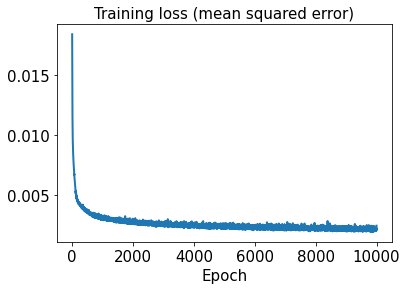

In [48]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

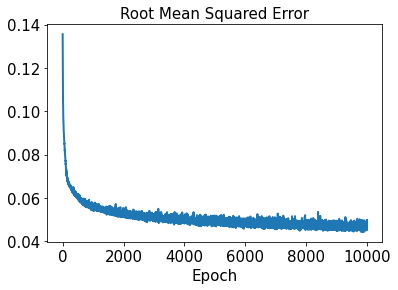

In [49]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [50]:
x_train[0]

array([[ 0.107   ],
       [-0.128107],
       [ 0.108   ]], dtype=float32)

In [84]:
x_train

array([[[ 0.107     ],
        [-0.128107  ],
        [ 0.108     ]],

       [[ 0.0239276 ],
        [-0.123708  ],
        [-0.0301692 ]],

       [[-0.0381808 ],
        [ 0.0776285 ],
        [-0.0789334 ]],

       [[ 0.170593  ],
        [-0.116396  ],
        [ 0.0618577 ]],

       [[-0.0424837 ],
        [-0.0988644 ],
        [ 0.130288  ]],

       [[ 0.209563  ],
        [-0.160804  ],
        [ 0.162643  ]],

       [[ 0.012498  ],
        [-0.111087  ],
        [ 0.0859705 ]],

       [[-0.0938866 ],
        [-0.113024  ],
        [ 0.0253252 ]],

       [[ 0.0624406 ],
        [-0.0773889 ],
        [ 0.0162067 ]],

       [[-0.0373809 ],
        [-0.0874715 ],
        [ 0.0176502 ]],

       [[-0.101297  ],
        [-0.104733  ],
        [ 0.0337379 ]],

       [[ 0.0714984 ],
        [-0.12466   ],
        [ 0.0980728 ]],

       [[-0.0621253 ],
        [-0.121939  ],
        [ 0.123412  ]],

       [[ 0.123167  ],
        [-0.0523242 ],
        [ 0.0328956 ]],

      

In [85]:
y_train1 = y_train[1].reshape(1, 100, 100)

In [87]:
print(y_train1)

[[[-1.0477e-04 -6.7621e-05 -3.8344e-05 ... -2.8326e-05  4.4471e-05
    1.0351e-04]
  [-9.5571e-05 -5.7065e-05 -2.0646e-05 ... -4.8642e-05  6.2661e-06
    6.0955e-05]
  [-8.1892e-05 -4.1234e-05 -4.4579e-06 ... -7.2953e-05 -1.8219e-05
    2.3358e-05]
  ...
  [ 1.5241e-04  1.7698e-04  1.9953e-04 ... -2.7556e-04 -1.5600e-04
   -4.3986e-05]
  [ 1.6383e-04  1.8974e-04  2.2836e-04 ... -3.2534e-04 -1.8786e-04
   -7.5097e-05]
  [ 1.8024e-04  2.2282e-04  2.5589e-04 ... -3.9789e-04 -1.7850e-04
   -9.9563e-05]]]


In [88]:
train1 = x_train[1].reshape(1,3,1)

In [54]:
test_results = sd.evaluate(x_train)

5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [55]:
decoded_imgs = sd.predict(x_train)

In [56]:
decoded_imgs

array([[[-1.51969318e-04, -1.21987228e-04, -9.43440318e-05, ...,
         -6.90582528e-05, -1.06720894e-04, -1.29283144e-04],
        [-1.60860975e-04, -1.22068079e-04, -6.43929088e-05, ...,
         -8.55547914e-05, -1.19380056e-04, -1.39696698e-04],
        [-1.60204363e-04, -9.35337375e-05, -3.56814562e-05, ...,
         -1.04843079e-04, -1.38484786e-04, -1.42628211e-04],
        ...,
        [ 1.59118645e-06,  4.81049283e-05,  9.89146065e-05, ...,
         -2.21841765e-05, -3.45279987e-05, -3.95636962e-05],
        [ 8.39980203e-07,  4.72557513e-05,  7.04816921e-05, ...,
         -2.00137438e-05, -2.68127478e-05, -3.58804173e-05],
        [-3.96621181e-06,  2.28018471e-05,  4.03368176e-05, ...,
         -1.35583687e-05, -3.67005123e-05, -3.12716438e-05]],

       [[-9.18781589e-05, -5.46483134e-05, -2.69686680e-05, ...,
         -1.32250643e-05,  6.56371776e-05,  1.30610686e-04],
        [-1.00775811e-04, -6.39276623e-05, -3.46773450e-05, ...,
         -8.25368625e-06,  6.56422999e

In [57]:
error_train = np.abs(decoded_imgs - y_train) / y_train * 100
print(error_train)

[[[-2.99519157e+01 -9.29775524e+00 -7.63481934e+02 ... -4.23553810e+01
   -2.61344852e+01 -9.57324028e+00]
  [-1.45810471e+01 -3.17162991e+01 -2.44273468e+02 ... -4.46998940e+01
   -2.43328552e+01 -6.58863640e+00]
  [-2.46349603e-01 -9.98581982e+00 -1.99175148e+01 ... -4.45392113e+01
   -2.77709332e+01 -1.08852148e+01]
  ...
  [-1.10081009e+02  3.60290192e+02  1.73403366e+02 ... -6.92522736e+01
   -5.22440910e+01 -4.21938362e+01]
  [-1.04568085e+02  1.00785950e+03 -4.30786230e+03 ... -7.45957184e+01
   -6.27274590e+01 -5.05411491e+01]
  [-8.57938614e+01 -2.10893158e+02 -1.89422745e+02 ... -8.48095703e+01
   -4.66577835e+01 -5.63757019e+01]]

 [[-1.23048973e+01 -1.91844025e+01 -2.96665230e+01 ... -5.33112183e+01
    4.75954666e+01  2.61817093e+01]
  [-5.44601679e+00 -1.20260429e+01 -6.79615631e+01 ... -8.30317688e+01
    9.47578247e+02  1.13008972e+02]
  [-2.32519131e+01 -7.83875275e+01 -8.86911194e+02 ... -9.27694626e+01
   -4.75993103e+02  4.13046936e+02]
  ...
  [ 5.71808701e+01  6.3

In [58]:
error_train_abs = decoded_imgs - y_train

In [59]:
print(np.mean(error_train))

47.638268


In [60]:
print(np.max(error_train))

39994880.0


In [61]:
print(np.mean(error_train_abs))

-5.2740972e-05


In [62]:
print(np.max(error_train_abs))

0.845197


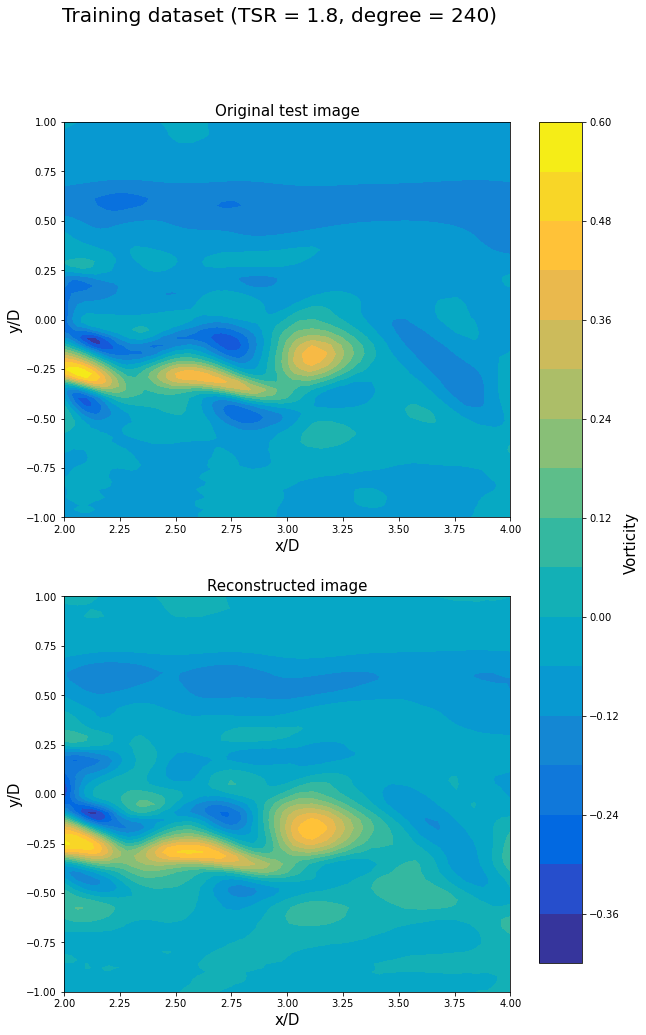

In [89]:
plt.figure(figsize=(8, 16))
y_train1_rotate = y_train1.T.reshape(100, 100)
decoded_rotate = decoded_imgs[1].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train1_rotate.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('Vorticity', fontsize=15)
#cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Training dataset (TSR = 1.8, degree = 240)',fontsize=20)
plt.show()

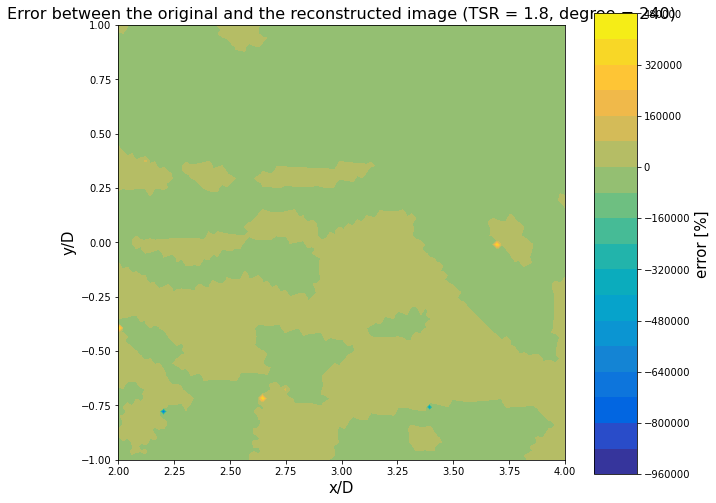

In [90]:
error_train_rotate = error_train[1].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_rotate.T, levels=16, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.8, degree = 240)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [91]:
error_train_abs1 = (decoded_imgs[1] - y_train1)
print(error_train_abs1)

[[[ 1.28918400e-05  1.29726832e-05  1.13753304e-05 ...  1.51009353e-05
    2.11661791e-05  2.71006866e-05]
  [-5.20481262e-06 -6.86266139e-06 -1.40313441e-05 ...  4.03883132e-05
    5.93762015e-05  6.88846194e-05]
  [-1.90414576e-05 -3.23223139e-05 -3.95376155e-05 ...  6.76781056e-05
    8.67211857e-05  9.64794963e-05]
  ...
  [-8.71493612e-05 -1.13041351e-04 -1.42218807e-04 ...  1.12362060e-04
    1.18847282e-04  1.22751560e-04]
  [-9.27525252e-05 -1.19707845e-04 -1.49635176e-04 ...  1.00710618e-04
    1.12314534e-04  1.16657749e-04]
  [-1.00800178e-04 -1.28235930e-04 -1.58213952e-04 ...  8.35559331e-05
    1.13673057e-04  1.11475914e-04]]]


In [141]:
l2_error_train1 = np.sqrt(np.sum((decoded_imgs[1] - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.23987852


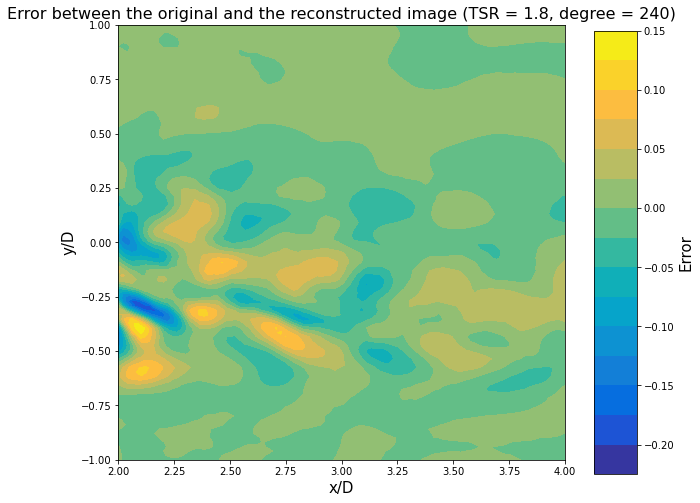

In [92]:
error_train_abs_rotate = error_train_abs1.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs_rotate.T, levels=16, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.8, degree = 240)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.77])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Error', fontsize=15)

plt.show()

In [93]:
print(np.mean(error_train_abs1))

-0.00035813742


In [94]:
print(np.max(error_train_abs1))

0.14094844


In [95]:
print(np.min(error_train_abs1))

-0.2019965


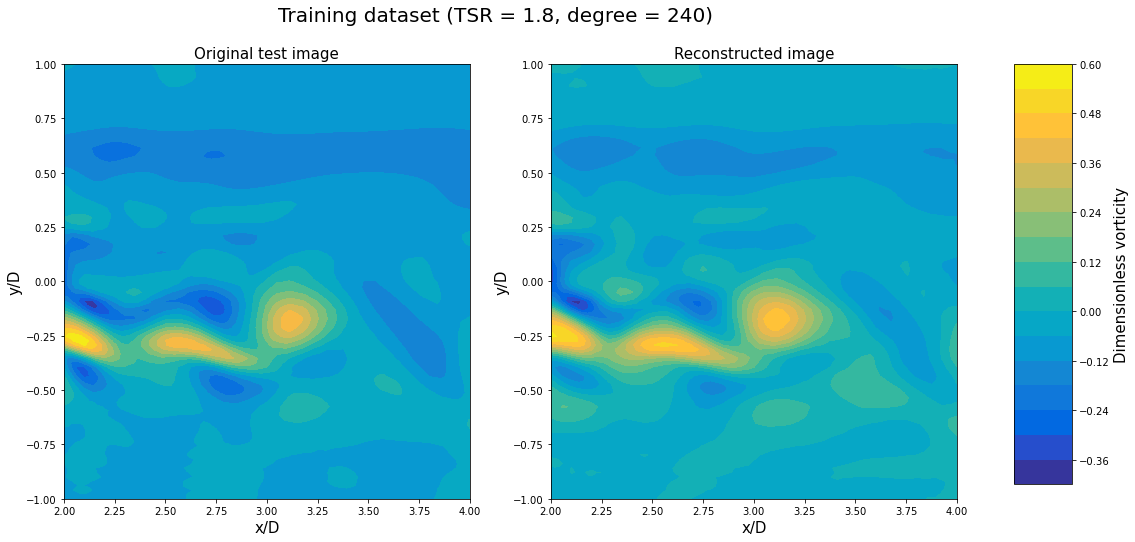

In [96]:
plt.figure(figsize=(16, 8))
y_train1_rotate2 = y_train1.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs[1].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, y_train1_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('Dimensionless vorticity', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.8, degree = 240)',fontsize=20)
plt.show()

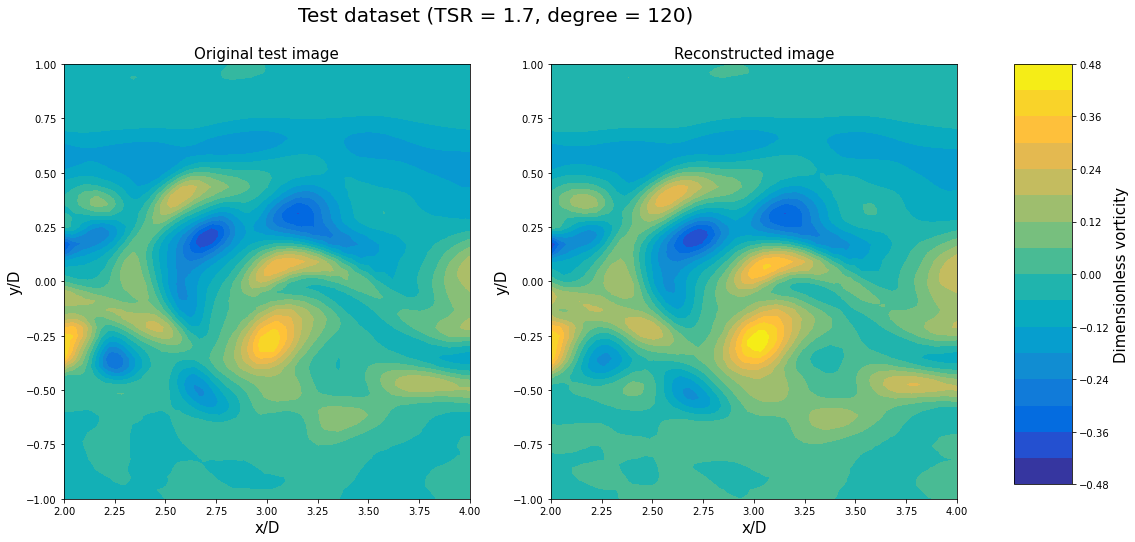

In [97]:
plt.figure(figsize=(16, 8))
y_train5 = y_train[2].reshape(1, 100, 100)
y_train5_rotate2 = y_train5.T.reshape(100, 100)
decoded_imgs5 = sd.predict(x_train[2].reshape(1,3,1))
decoded_rotate5 = decoded_imgs5.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, y_train5_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate5.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('Dimensionless vorticity', fontsize=15)

plt.suptitle('Test dataset (TSR = 1.7, degree = 120)',fontsize=20)
plt.show()

In [139]:
error_train5_abs = (decoded_imgs5 - y_train5)
print(error_train5_abs)

[[[ 3.81506106e-06 -1.09560351e-05 -3.05533467e-05 ... -3.61932325e-06
    2.38651410e-09 -4.37343260e-07]
  [-5.32875856e-06 -1.77066613e-05 -2.78766456e-05 ...  2.64393748e-06
   -4.98257577e-08 -1.66814425e-06]
  [-1.26274390e-05 -1.69069754e-05 -2.70303790e-05 ...  6.74385228e-06
    4.02054866e-06 -6.30787690e-06]
  ...
  [-7.40778996e-05 -5.73555444e-05 -3.74619121e-05 ...  5.17227454e-06
   -3.54550866e-06 -1.02732665e-05]
  [-4.22369194e-05 -2.59032095e-05 -2.41753005e-05 ...  1.93644810e-05
    8.20852438e-06  1.05633080e-06]
  [-1.58990297e-05 -2.09729042e-05 -8.71636439e-06 ...  3.63936560e-05
    1.48840772e-05  1.19172037e-05]]]


In [143]:
l2_error_train2 = np.sqrt(np.sum((decoded_imgs5 - y_train5)**2) / np.sum(y_train5**2))
print(l2_error_train2)

0.12546636


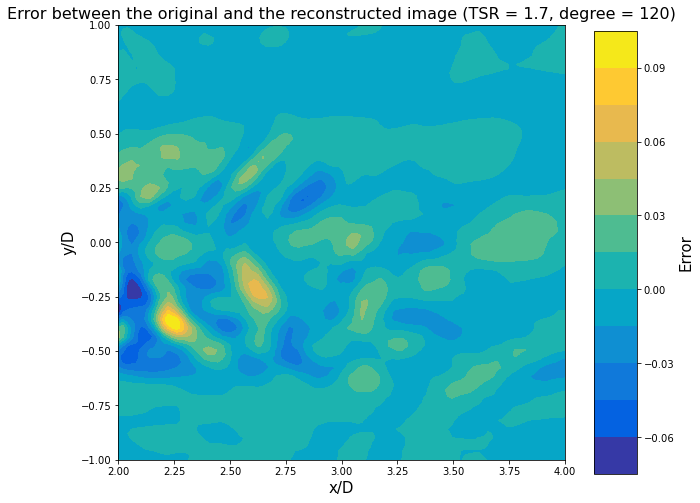

In [140]:
error_train_abs_rotate5 = error_train5_abs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs_rotate5.T, levels=16, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.7, degree = 120)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.77])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Error', fontsize=15)

plt.show()

In [74]:
decoded_train = sd.predict(x_train)

In [80]:
l2_error_train = np.sqrt(np.sum((y_train - decoded_train)**2) / np.sum(y_train**2))

In [81]:
l2_error_train

0.3965004

In [77]:
decoded_test = sd.predict(x_test)

In [82]:
l2_error_test = np.sqrt(np.sum((y_test - decoded_test)**2) / np.sum(y_test**2))

In [83]:
l2_error_test

0.6986355

In [101]:
x_test

array([[[ 8.39000e-02],
        [-1.36119e-01],
        [ 1.54000e-01]],

       [[-5.42000e-02],
        [-1.05747e-01],
        [ 1.15025e-01]],

       [[ 8.47921e-02],
        [-8.23942e-02],
        [ 3.81470e-02]],

       [[ 1.69000e-02],
        [-1.25675e-01],
        [ 1.13000e-01]],

       [[ 1.06000e-01],
        [-1.36558e-01],
        [ 1.17000e-01]],

       [[ 1.46632e-01],
        [-1.29714e-01],
        [ 3.72918e-02]],

       [[ 4.98709e-02],
        [-1.31626e-01],
        [ 2.38613e-02]],

       [[-6.53569e-02],
        [-1.05767e-01],
        [-5.91612e-03]],

       [[ 1.42602e-01],
        [-1.24461e-01],
        [ 1.80311e-01]],

       [[ 1.72407e-01],
        [-1.14987e-01],
        [ 2.36420e-01]],

       [[ 1.22082e-01],
        [-1.31696e-01],
        [-2.52866e-03]],

       [[ 6.82000e-02],
        [-1.34233e-01],
        [ 2.25000e-01]],

       [[-9.79645e-03],
        [-1.05573e-01],
        [ 1.90101e-02]],

       [[ 4.08107e-02],
        [-9.04

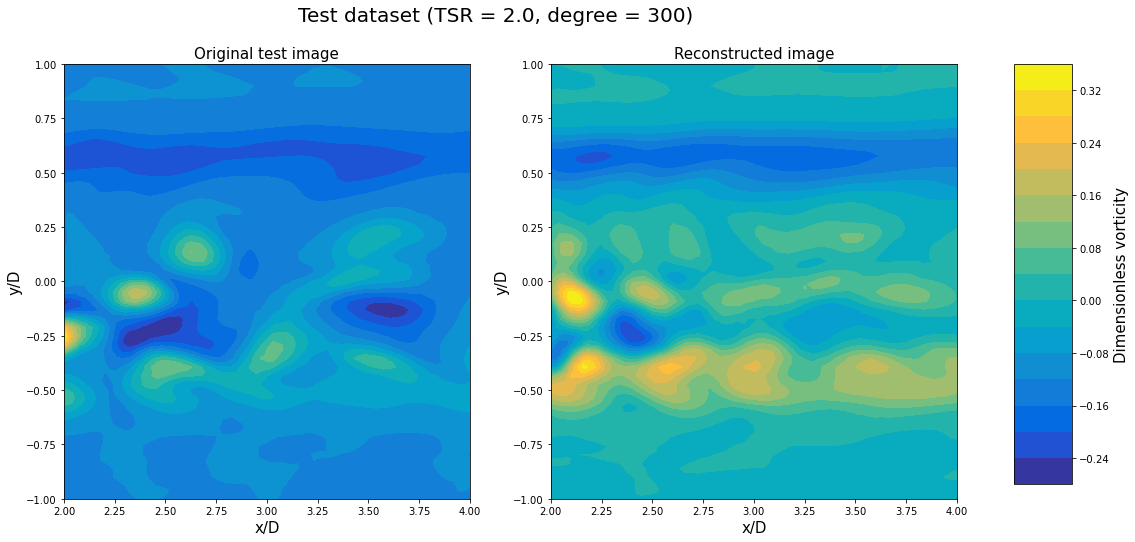

In [102]:
plt.figure(figsize=(16, 8))
y_test1 = y_test[1].reshape(1, 100, 100)
y_test1_rotate2 = y_test1.T.reshape(100, 100)
decoded_imgs1 = sd.predict(x_test[1].reshape(1,3,1))
decoded_rotate1 = decoded_imgs1.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, y_test1_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate1.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('Dimensionless vorticity', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0, degree = 300)',fontsize=20)
plt.show()

In [104]:
error_test_abs = (decoded_test - y_test)
print(error_test_abs)

[[[-8.69333599e-06  2.14794272e-05  4.65497287e-05 ...  2.67215873e-05
   -1.00965190e-06 -3.41926425e-05]
  [ 4.93200787e-07  1.87803089e-05  7.95588130e-06 ... -3.25944820e-05
   -6.08409755e-05 -9.50847607e-05]
  [-1.44668338e-05 -2.19466856e-05 -3.27660273e-05 ... -8.93044926e-05
   -1.17726959e-04 -1.21606441e-04]
  ...
  [ 2.70387973e-05  3.82646831e-05  5.10636237e-05 ...  1.01385755e-04
    7.27382212e-05  4.87260913e-05]
  [ 3.52841744e-05  4.31484659e-05  3.10839241e-05 ...  9.18341466e-05
    6.72437964e-05  4.15528339e-05]
  [ 3.72035647e-05  2.77951258e-05  9.74386785e-06 ...  8.48061754e-05
    5.33511775e-05  3.44211549e-05]]

 [[ 2.06448822e-05  9.33770934e-06  3.07249866e-06 ...  3.21613334e-05
    1.84124146e-05  2.60334709e-05]
  [ 4.06472827e-05  2.57137872e-05  8.41458677e-06 ...  2.92247278e-05
    3.36497687e-05  4.58460345e-05]
  [ 5.33352795e-05  2.97497609e-05  1.20858167e-05 ...  3.00430402e-05
    3.46953457e-05  6.71594025e-05]
  ...
  [-4.59923613e-05 -5.2

In [146]:
l2_error_test1 = np.sqrt(np.sum((y_test[1] - decoded_test[1])**2) / np.sum(y_test[1]**2))
print(l2_error_test1)

0.7789774


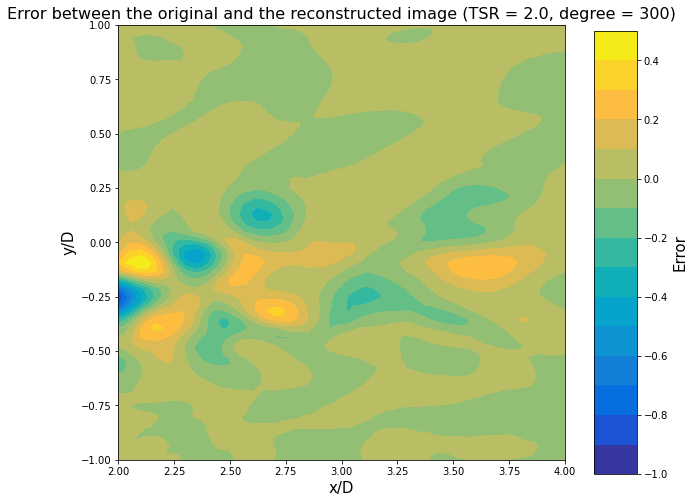

In [107]:
error_test_abs_rotate1 = error_test_abs[1].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate1.T, levels=16, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0, degree = 300)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.77])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Error', fontsize=15)

plt.show()

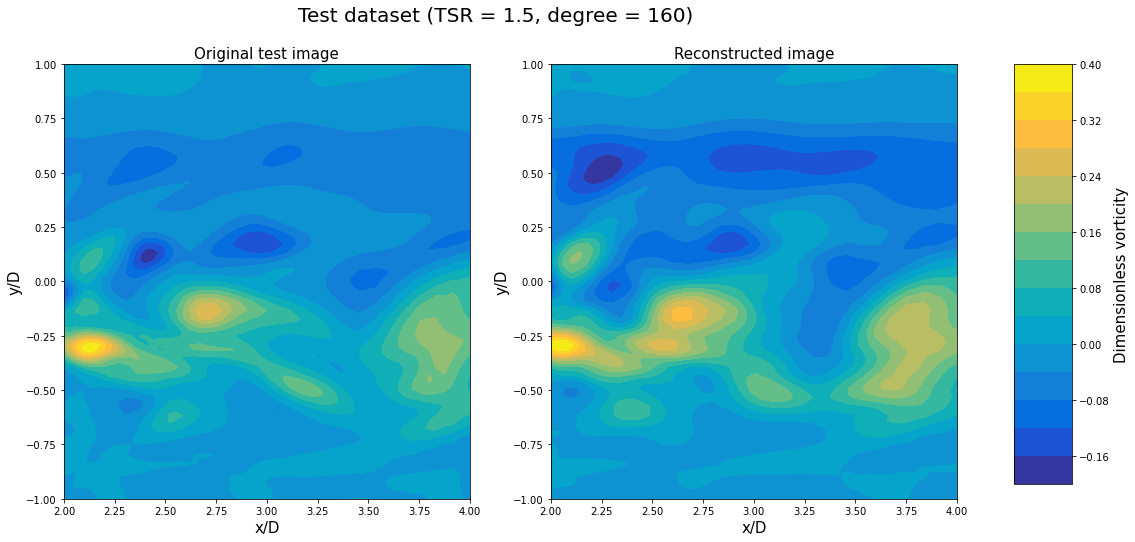

In [108]:
plt.figure(figsize=(16, 8))
y_test2 = y_test[2].reshape(1, 100, 100)
y_test2_rotate2 = y_test2.T.reshape(100, 100)
decoded_imgs2 = sd.predict(x_test[2].reshape(1,3,1))
decoded_rotate2 = decoded_imgs2.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, y_test2_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('Dimensionless vorticity', fontsize=15)

plt.suptitle('Test dataset (TSR = 1.5, degree = 160)',fontsize=20)
plt.show()

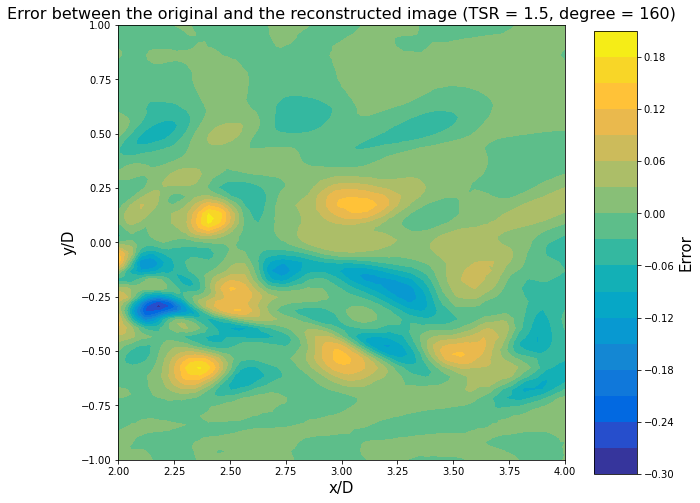

In [109]:
error_test_abs_rotate2 = error_test_abs[2].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate2.T, levels=16, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5, degree = 160)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.77])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('Error', fontsize=15)

plt.show()

In [147]:
l2_error_test2 = np.sqrt(np.sum((decoded_test[2] - y_test[2])**2) / np.sum(y_test[2]**2))
print(l2_error_test2)

0.4232964


In [110]:
vor_ytrain1_D200 = y_train[1].T[:, 0]
vor_ytrain1_D225 = y_train[1].T[:, 12]
vor_ytrain1_D250 = y_train[1].T[:, 24]
vor_ytrain2_D200 = y_train[2].T[:, 0]
vor_ytrain2_D225 = y_train[2].T[:, 12]
vor_ytrain2_D250 = y_train[2].T[:, 24]
vor_ytest1_D200 = y_test[1].T[:, 0]
vor_ytest1_D225 = y_test[1].T[:, 12]
vor_ytest1_D250 = y_test[1].T[:, 24]
vor_ytest2_D200 = y_test[2].T[:, 0]
vor_ytest2_D225 = y_test[2].T[:, 12]
vor_ytest2_D250 = y_test[2].T[:, 24]

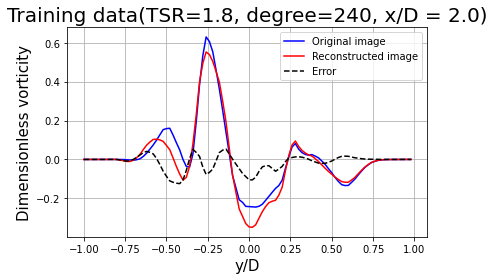

In [165]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), decoded_imgs[1].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D200.reshape(100,1)-decoded_imgs[1].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

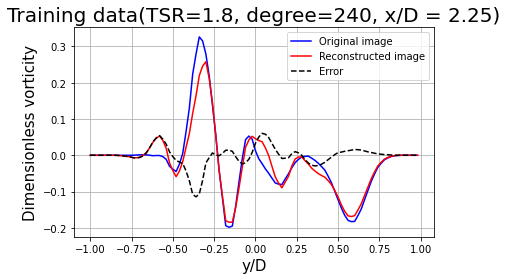

In [166]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), decoded_imgs[1].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D225.reshape(100,1)-decoded_imgs[1].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

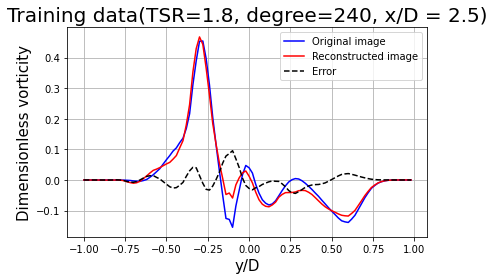

In [167]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), decoded_imgs[1].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D250.reshape(100,1)-decoded_imgs[1].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.8, degree=240, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

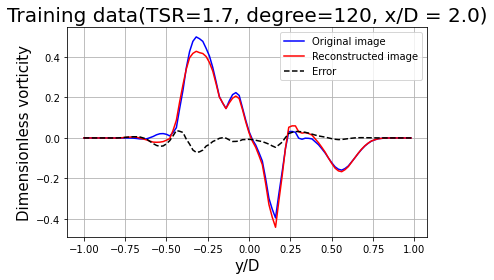

In [168]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), decoded_imgs[2].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D200.reshape(100,1)-decoded_imgs[2].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

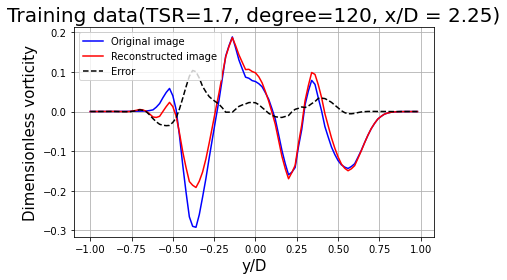

In [169]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), decoded_imgs[2].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D225.reshape(100,1)-decoded_imgs[2].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

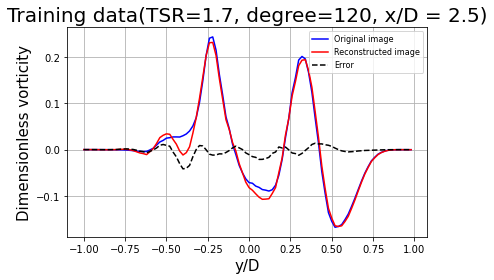

In [170]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), decoded_imgs[2].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D250.reshape(100,1)-decoded_imgs[2].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=1.7, degree=120, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right',fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

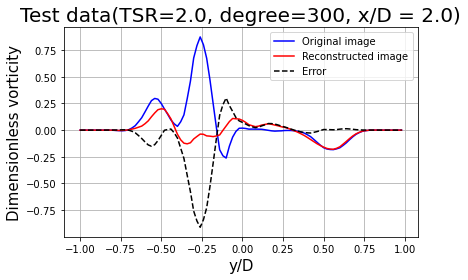

In [171]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D200.reshape(100,1)-decoded_test[1].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

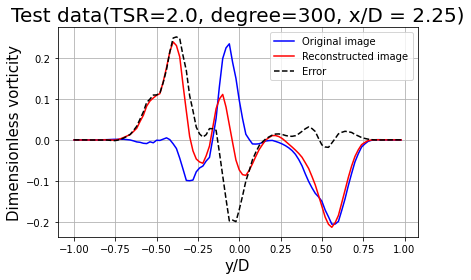

In [172]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D225.reshape(100,1)-decoded_test[1].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

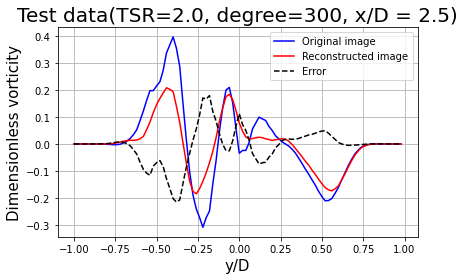

In [173]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D250.reshape(100,1)-decoded_test[1].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

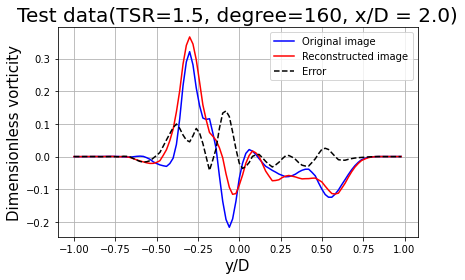

In [174]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D200.reshape(100,1)-decoded_test[2].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

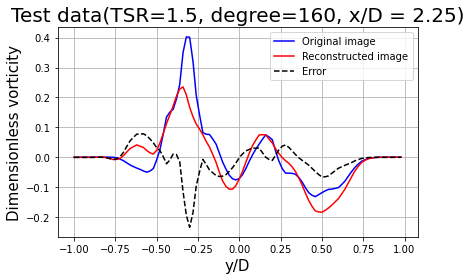

In [175]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D225.reshape(100,1)-decoded_test[2].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

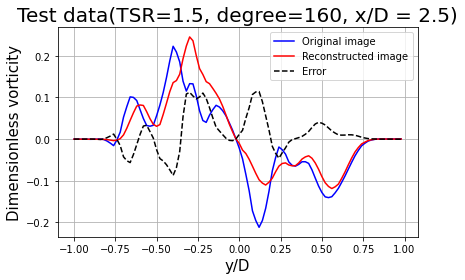

In [176]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D250.reshape(100,1)-decoded_test[2].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=1.5, degree=160, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()